# Скринкаст интерполяция

In [21]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

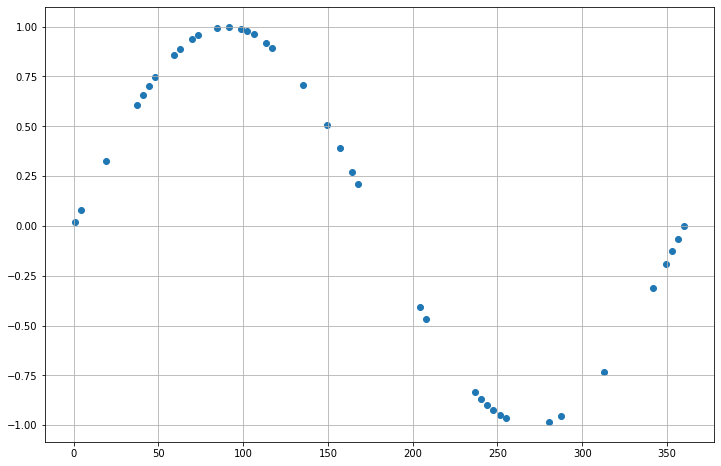

In [22]:
N = 100

df = pd.DataFrame()
## создаём N точек для оси времени
df['t'] = np.linspace(1, 360, N)
## cтроим синус на этих точках
df['y'] = np.sin(df.t * np.pi / 180)


np.random.seed(42)
## готовим точки, которые будут пропущены в выборке
missing = np.random.randint(low=1, high=100, size=100)
## убираем часть данных из выборки
df.loc[missing, 'y'] = np.nan

## визуализируем ряд с пропущенными данными
f, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df.t, df.y)
ax.grid()

In [23]:
df.head()

,t,y
0,1.000000,0.017452
1,4.626263,0.080656
2,8.252525,NaN
3,11.878788,NaN
4,15.505051,NaN


In [24]:
df.shape

(100, 2)

In [25]:
df.isna().sum()

t     0
y    61
dtype: int64

# Интерполяция

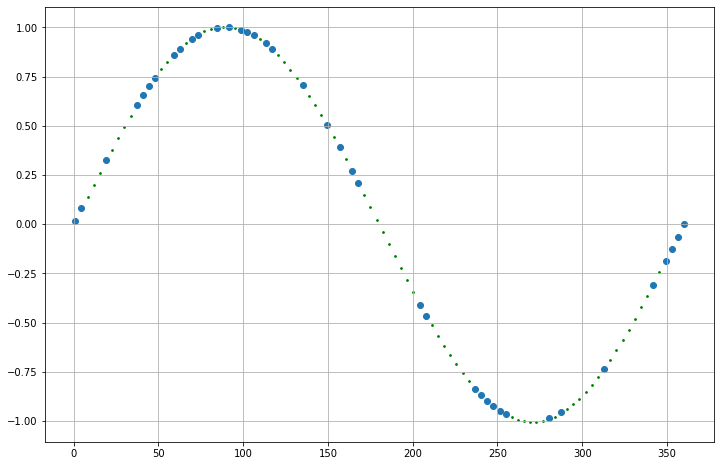

In [26]:
df['y_nearest'] = df.y.interpolate(method='nearest')
df['y_linear'] = df.y.interpolate(method='linear')
df['y_spline'] = df.y.interpolate(method='spline', order=5)

## визуализируем ряд с пропущенными данными
f, ax = plt.subplots(figsize=(12, 8))
# ax.scatter(df.t, df.y_nearest, c='r')
# ax.scatter(df.t, df.y_linear, c='g', s=3)
ax.scatter(df.t, df.y_spline, c='g', s=3)
ax.scatter(df.t, df.y)
ax.grid()

# Приведение к фиксированной сетке

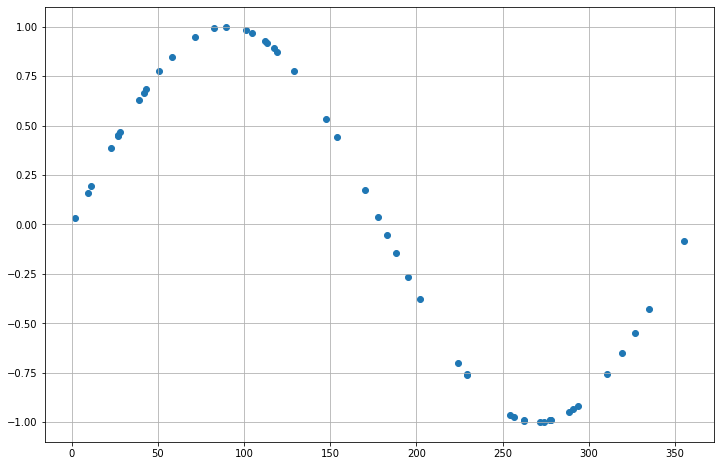

In [27]:
N = 360
df = pd.DataFrame()
## создаём 50 случайных точек для оси времени
df['t'] = N*np.random.rand(50)
## cтроим синус на этих точках
df['y'] = np.sin(df.t * np.pi / 180)
df = df.sort_values(by='t')

## визуализируем
f, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df.t, df.y)
ax.grid()
plt.show()

In [28]:
df.head()

,t,y
8,1.987962,0.034690
34,9.150886,0.159035
36,11.314507,0.196194
19,22.881006,0.388819
13,26.656075,0.448634


In [29]:
df.isna().sum()

t    0
y    0
dtype: int64

In [30]:
## создаём регулярную сетку
ti = np.linspace(1, N, N)
# print(ti)

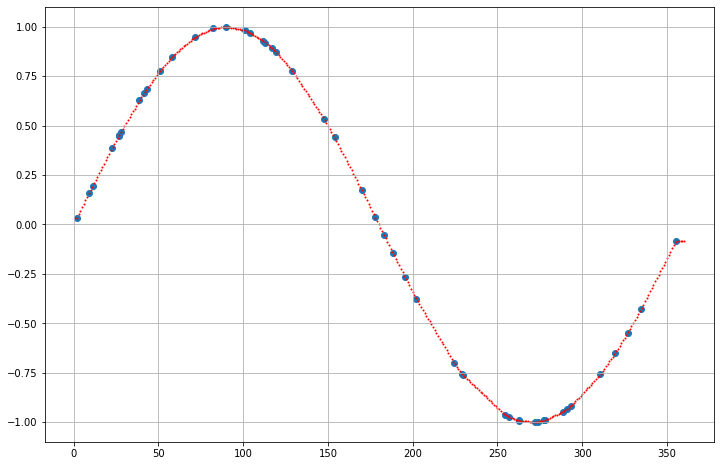

In [31]:
## создаём новый дейтафрейм для интерполированных значений
df_interp = pd.DataFrame()
df_interp['t'] = ti
## интерполируем значения исходного дейтафрейма на регулярной сетке
df_interp['y'] = np.interp(ti, df.t, df.y)

## визуализируем
f, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df.t, df.y)
ax.scatter(df_interp.t, df_interp.y, marker='.', c='r', s=4)
ax.grid()
plt.show()

In [32]:
df_interp.head(50)

,t,y
0,1.0,0.034690
1,2.0,0.034898
2,3.0,0.052258
3,4.0,0.069618
4,5.0,0.086977
5,6.0,0.104337
6,7.0,0.121696
7,8.0,0.139056
8,9.0,0.156416
9,10.0,0.173618


In [33]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

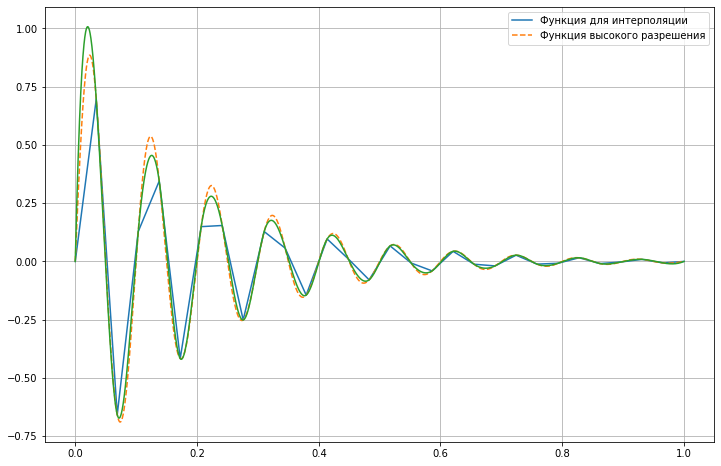

In [34]:
w1 = 10    
a1 = 1     
Fs = 30 
Ts = 1.0/Fs
alpha = 5

## исходная ось (низкое разрешение)
t = np.linspace(0, 1, Fs)
## функция для интерполяции
y = a1*np.exp(-alpha*t) * np.sin(2*np.pi*w1*t) 
 

## интерполяционная сетка (высокое разрешение)
tt = np.linspace(0, 1, 100*Fs)
## функция высокого разрешения (пытаемся получить её интерполяцией)
y_high_res = a1*np.exp(-alpha*tt) * np.sin(2*np.pi*w1*tt) 
f_interp =  interpolate.interp1d(t, y, kind='cubic')
y_spline = f_interp(tt)


f, ax = plt.subplots(figsize=(12, 8))
ax.plot(t, y)
ax.plot(tt, y_high_res, '--')
ax.plot(tt, y_spline)
ax.legend(['Функция для интерполяции', 'Функция высокого разрешения'])
ax.grid()
plt.show()

Задание 8.8.1

Проинтерполируйте функцию "y" на сетке "tt" кубическим сплайном, используйте для этого interpolate.interp1d. Укажите среднее квадратическое отклонение интерполированной функции от функции высокого разрешения y_high_res по формуле , округлите до 5 знака, после запятой.

In [35]:
from sklearn import metrics

In [36]:
np.round(metrics.mean_squared_error(y_high_res, f_interp(tt)), 5)

0.00105

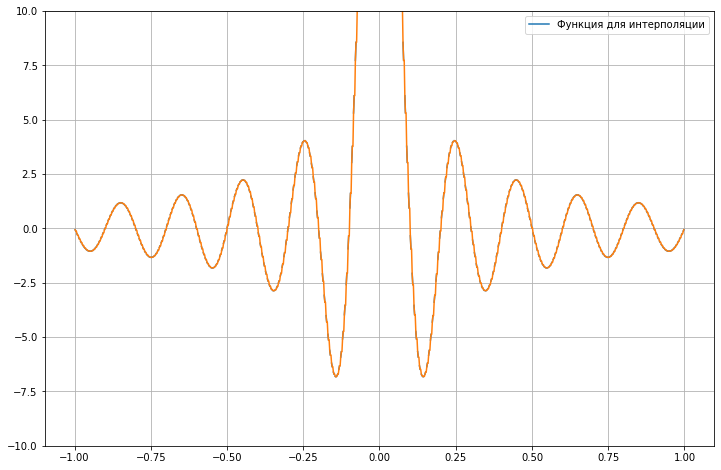

,t,y,y_lost,y_near
0,-1.000000,-1.224647e-15,NaN,NaN
1,-0.997998,-6.297937e-02,-0.062979,-0.062979
2,-0.995996,-1.259624e-01,-0.125962,-0.125962
3,-0.993994,-1.887000e-01,NaN,-0.125962
4,-0.991992,-2.509431e-01,-0.250943,-0.250943
5,-0.989990,-3.124436e-01,-0.312444,-0.312444
6,-0.987988,-3.729553e-01,NaN,-0.312444
7,-0.985986,-4.322350e-01,-0.432235,-0.432235
8,-0.983984,-4.900431e-01,-0.490043,-0.490043
9,-0.981982,-5.461451e-01,NaN,-0.490043


In [37]:
w1 = 5   
a1 = 1     
Fs = 1000
Ts = 1.0/Fs
alpha = 5

df = pd.DataFrame()
## ось
df['t'] = np.linspace(-1, 1, Fs)
## функция для интерполяции
df['y'] = np.sin(2*np.pi*w1*df.t) / df.t 
 
## пропущенные значения    
df['y_lost'] = df.y
df.loc[0::3, 'y_lost'] = np.nan

df['y_near'] = df.y_lost.interpolate(method='nearest')
#y_near = f_interp(tt)

f, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.t, df.y_lost)
ax.set_ylim([-10, 10])
ax.plot(df.t, df.y_near)
ax.legend(['Функция для интерполяции'])
ax.grid()
plt.show()

df.head(10)

Задание 8.8.2

Проинтерполируйте пропущенные значения функции y_lost, используя метод interpolate с параметром nearest из пакета pandas. Укажите среднее квадратическое отклонение интерполированной функции от исходной функции "y" , округлите до 3 знака после точки.

In [38]:
np.round(metrics.mean_squared_error(df.y[1:-1], df.y_near[1:-1]), 3)

0.021

Задание 8.8.3

Проинтерполируйте пропущенные значения функции y_lost, используя метод interpolate с параметром polynomial, order = 5 из пакета pandas. Укажите среднее квадратическое отклонение интерполированной функции от исходной функции "y" , округлите до 5 знака, после запятой.

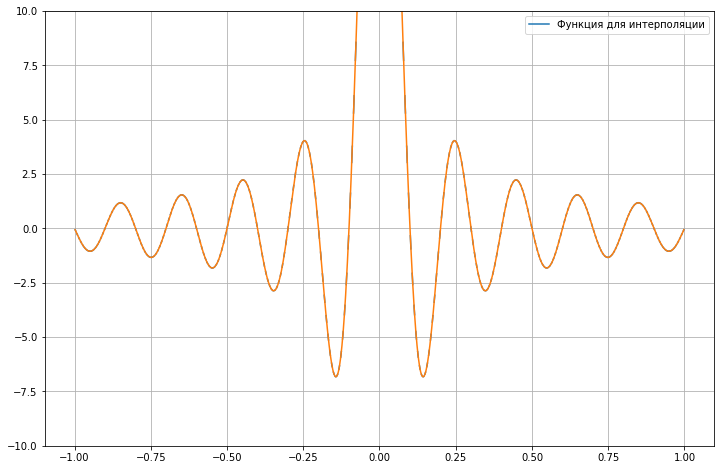

,t,y,y_lost,y_near
0,-1.000000,-1.224647e-15,NaN,NaN
1,-0.997998,-6.297937e-02,-0.062979,-0.062979
2,-0.995996,-1.259624e-01,-0.125962,-0.125962
3,-0.993994,-1.887000e-01,NaN,-0.188700
4,-0.991992,-2.509431e-01,-0.250943,-0.250943
5,-0.989990,-3.124436e-01,-0.312444,-0.312444
6,-0.987988,-3.729553e-01,NaN,-0.372955
7,-0.985986,-4.322350e-01,-0.432235,-0.432235
8,-0.983984,-4.900431e-01,-0.490043,-0.490043
9,-0.981982,-5.461451e-01,NaN,-0.546145


In [39]:
w1 = 5   
a1 = 1     
Fs = 1000
Ts = 1.0/Fs
alpha = 5

df = pd.DataFrame()
## ось
df['t'] = np.linspace(-1, 1, Fs)
## функция для интерполяции
df['y'] = np.sin(2*np.pi*w1*df.t) / df.t 
 
## пропущенные значения    
df['y_lost'] = df.y
df.loc[0::3, 'y_lost'] = np.nan

df['y_near'] = df.y_lost.interpolate(method='polynomial', order=5)
#y_near = f_interp(tt)

f, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.t, df.y_lost)
ax.set_ylim([-10, 10])
ax.plot(df.t, df.y_near)
ax.legend(['Функция для интерполяции'])
ax.grid()
plt.show()

df.head(10)

In [40]:
np.round(metrics.mean_squared_error(df.y[1:-1], df.y_near[1:-1]), 5)

0.0